# Statistical learning: the setting and the estimator object in scikit-learn

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [4]:
# print(iris.DESCR)

In [5]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

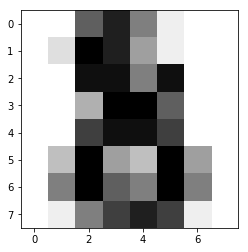

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [12]:
# Reshaping data for scikit
data = digits.images.reshape((digits.images.shape[0], -1))

digits.images.shape[0]

1797

## KNN - Classifying Irises

In [13]:
import numpy as np
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [19]:
np.random.seed(0)

indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [24]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Linear Model

In [25]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

In [26]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

/Users/subhashbhushan/.pyenv/versions/3.6.5/envs/100-days/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [28]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898225

In [29]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690571

In [57]:
#print(diabetes.DESCR)

### Ridge Regression

In [43]:
alphas = np.logspace(-4, -1, 6)
alphas

array([0.0001    , 0.00039811, 0.00158489, 0.00630957, 0.02511886,
       0.1       ])

In [44]:
regr = linear_model.Ridge(alpha=.1)

regr.fit(diabetes_X_train, diabetes_y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
print(regr.coef_)

[  11.1136556  -204.19946801  480.69629861  303.83348865  -88.06728559
  -66.87260956 -193.14729968  119.53475526  430.10894133   95.56293006]


In [46]:
regr.score(diabetes_X_test, diabetes_y_test)

0.570589994372801

### Lasso Regression

In [47]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test) for alpha in alphas]

In [48]:
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha

In [49]:
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [51]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5887622418309261

## Classfication

In [59]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [60]:
logistic.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [61]:
logistic.score(iris_X_test, iris_y_test)

0.9